# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/macowner/Downloads/SMDA201902DATA2-master/02-Homework/06-Python-APIs/Instructions/starter_code/Cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
query_url = url + "appid=" + api_key + "&q=" + city
response = requests.get(query_url).json()
print(json.dumps(response, indent = 4))

{
    "coord": {
        "lon": -0.13,
        "lat": 51.51
    },
    "weather": [
        {
            "id": 701,
            "main": "Mist",
            "description": "mist",
            "icon": "50n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 278.9,
        "pressure": 1025,
        "humidity": 87,
        "temp_min": 276.48,
        "temp_max": 280.37
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.1,
        "deg": 220
    },
    "clouds": {
        "all": 90
    },
    "dt": 1552966658,
    "sys": {
        "type": 1,
        "id": 1414,
        "message": 0.0081,
        "country": "GB",
        "sunrise": 1552975586,
        "sunset": 1553019024
    },
    "id": 2643743,
    "name": "London",
    "cod": 200
}


In [43]:
 # Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
print("Beginning Data Retrieval     ")
print("-----------------------------")
record = 0
set_count = 1
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
for city in cities:
        try:
            query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city
            response = requests.get(query_url).json()
            city_name.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            max_temp.append(response["main"]["temp_max"])
            wind_speed.append(response["wind"]["speed"])
            city_record = response["name"]
            if record <= 50:
                print(f"Processing Record {record} of Set {set_count}| {city_record}")
                record = record + 1
            else:
                record = 0
                set_count = set_count +1
                print(f"Processing Record {record} of Set {set_count}| {city_record}")
                record= record + 1
        except:
              print("City not found. Skipping...")
print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)



Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1| College
Processing Record 1 of Set 1| Mandera
Processing Record 2 of Set 1| Hithadhoo
Processing Record 3 of Set 1| Guerrero Negro
Processing Record 4 of Set 1| Bilibino
Processing Record 5 of Set 1| Ponta do Sol
Processing Record 6 of Set 1| Quesnel
Processing Record 7 of Set 1| Linjiang
Processing Record 8 of Set 1| Qaanaaq
Processing Record 9 of Set 1| Karla
Processing Record 10 of Set 1| Pevek
Processing Record 11 of Set 1| Hobart
Processing Record 12 of Set 1| Cabinda
Processing Record 13 of Set 1| Tasiilaq
Processing Record 14 of Set 1| Qaqortoq
Processing Record 15 of Set 1| New Norfolk
Processing Record 16 of Set 1| Panama City
Processing Record 17 of Set 1| Fairbanks
Processing Record 18 of Set 1| Butaritari
Processing Record 19 of Set 1| Saint Anthony
Processing Record 20 of Set 1| Hilo
City not found. Skipping...
Processing Record 21 of Set 1| Pangai
Processing Record 22 of Set 1| Ornsk

Processing Record 33 of Set 4| Codrington
Processing Record 34 of Set 4| Ilulissat
City not found. Skipping...
Processing Record 35 of Set 4| Alofi
City not found. Skipping...
City not found. Skipping...
Processing Record 36 of Set 4| Yumen
Processing Record 37 of Set 4| Waipawa
Processing Record 38 of Set 4| Anloga
Processing Record 39 of Set 4| Agadez
Processing Record 40 of Set 4| Puerto Escondido
City not found. Skipping...
Processing Record 41 of Set 4| Port Hedland
Processing Record 42 of Set 4| Grand Gaube
Processing Record 43 of Set 4| Rio Grande
Processing Record 44 of Set 4| Zaysan
Processing Record 45 of Set 4| Hasaki
Processing Record 46 of Set 4| Chokurdakh
Processing Record 47 of Set 4| Guarapari
Processing Record 48 of Set 4| Makurdi
Processing Record 49 of Set 4| Lusambo
Processing Record 50 of Set 4| Hamilton
Processing Record 0 of Set 5| Iqaluit
Processing Record 1 of Set 5| Kitovo
Processing Record 2 of Set 5| Phangnga
Processing Record 3 of Set 5| Bethel
Processing 

Processing Record 15 of Set 8| Gorontalo
Processing Record 16 of Set 8| San Isidro
Processing Record 17 of Set 8| Adelaide
Processing Record 18 of Set 8| Teguldet
Processing Record 19 of Set 8| Souillac
Processing Record 20 of Set 8| Te Anau
Processing Record 21 of Set 8| Mahon
Processing Record 22 of Set 8| Delijan
City not found. Skipping...
Processing Record 23 of Set 8| Lasa
City not found. Skipping...
Processing Record 24 of Set 8| Raudeberg
Processing Record 25 of Set 8| Kangaatsiaq
Processing Record 26 of Set 8| Kungurtug
Processing Record 27 of Set 8| Makakilo City
Processing Record 28 of Set 8| Camacha
Processing Record 29 of Set 8| Artyom
City not found. Skipping...
Processing Record 30 of Set 8| Solnechnyy
City not found. Skipping...
Processing Record 31 of Set 8| Westport
Processing Record 32 of Set 8| Isla del Bosque
City not found. Skipping...
Processing Record 33 of Set 8| Anadyr
City not found. Skipping...
Processing Record 34 of Set 8| Cherskiy
Processing Record 35 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
weather_df = pd.DataFrame()
weather_df['City'] = city_name
weather_df['Cloudiness'] = cloudiness
weather_df['Country'] = country
weather_df['Date'] = date
weather_df['Humidity'] = humidity
weather_df['Lat'] =lat
weather_df['Lng'] = lng
weather_df['Max Temp'] = max_temp
weather_df['Wind Speed'] = wind_speed
weather_df.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [45]:
weather_df.to_csv("Weather.csv", encoding='utf-8', index=False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,College,90,US,1552969704,60,64.86,-147.80,46.40,8.05
1,Mandera,0,ET,1552970609,47,3.94,41.86,84.54,5.41
2,Hithadhoo,68,MV,1552970609,100,-0.60,73.08,84.54,4.18
3,Guerrero Negro,0,MX,1552970609,99,27.97,-114.04,51.87,7.54
4,Bilibino,76,RU,1552970610,61,68.06,166.44,-8.52,5.64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

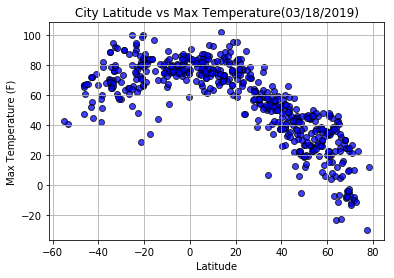

In [64]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],marker= 'o',facecolors = 'blue',
            edgecolors ="black", alpha =0.75)
plt.gca().set(xlabel = 'Latitude', ylabel = 'Max Temperature (F)',
              title = 'City Latitude vs Max Temperature(03/18/2019)')

plt.grid()
plt.savefig("/Users/macowner/Desktop/City Latitude vs Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

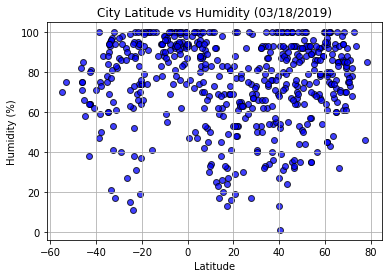

In [65]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'],marker= 'o',facecolors = 'blue',
            edgecolors ="black", alpha =0.75)
plt.gca().set(xlabel = 'Latitude', ylabel = 'Humidity (%)',
              title = 'City Latitude vs Humidity (03/18/2019)')

plt.grid()
plt.savefig("/Users/macowner/Desktop/City Latitude vs Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

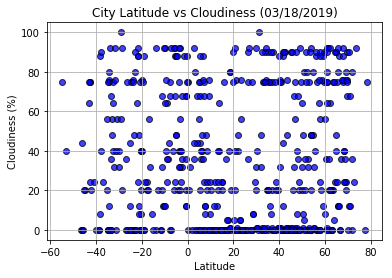

In [66]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],marker= 'o',facecolors = 'blue',
            edgecolors ="black", alpha =0.75)
plt.gca().set(xlabel = 'Latitude', ylabel = 'Cloudiness (%)',
              title = 'City Latitude vs Cloudiness (03/18/2019)')

plt.grid()
plt.savefig("/Users/macowner/Desktop/City Latitude vs Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

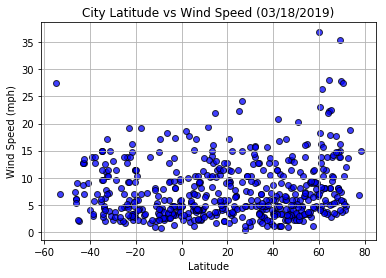

In [68]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],marker= 'o',facecolors = 'blue',
            edgecolors ="black", alpha =0.75)
plt.gca().set(xlabel = 'Latitude', ylabel = 'Wind Speed (mph)',
              title = 'City Latitude vs Wind Speed (03/18/2019)')

plt.grid()
plt.savefig("/Users/macowner/Desktop/City Latitude vs Wind Speed.png")
plt.show()